In [1]:
#ignorando los warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Se importa las funciones personalizadas
import sys
sys.path.append("..\\utils")

## 1. Importando las librerías

In [3]:
import pandas as pd
import numpy as np

from utils import metodo_elbow_kmeans, metodo_silueta, pca_componentes_optimos

from matplotlib import pyplot as plt

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import RobustScaler, MinMaxScaler
from sklearn.metrics import silhouette_score


##  2. Leyendo los datos

In [4]:
dataset = pd.read_csv('..\datos_procesados\Mall_Customers_procesado.csv', sep=';')
dataset

,Age,Annual Income (k$),Spending Score (1-100)
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40
...,...,...,...
195,35,120,79
196,45,126,28
197,32,126,74
198,32,137,18


## 3. Realizando el escalamiento de los datos

In [5]:
#esc = MinMaxScaler()
esc = RobustScaler()
dataset_esc = pd.DataFrame(esc.fit_transform(dataset), columns=dataset.columns.to_list())
dataset_esc

,Age,Annual Income (k$),Spending Score (1-100)
0,-0.839506,-1.273973,-0.287582
1,-0.740741,-1.273973,0.810458
2,-0.790123,-1.246575,-1.150327
3,-0.641975,-1.246575,0.705882
4,-0.246914,-1.219178,-0.261438
...,...,...,...
195,-0.049383,1.602740,0.758170
196,0.444444,1.767123,-0.575163
197,-0.197531,1.767123,0.627451
198,-0.197531,2.068493,-0.836601


## 4. Se ejecuta el método elbow

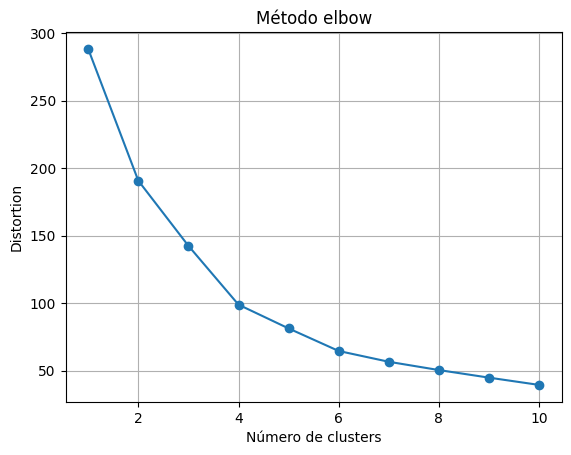

In [6]:
metodo_elbow_kmeans(n_grupos=10, dataset=dataset_esc)

## 5. Se ejecuta el método del análisis de siluetas

Puntaje máximo: 0.4266
Número de cluster: 6


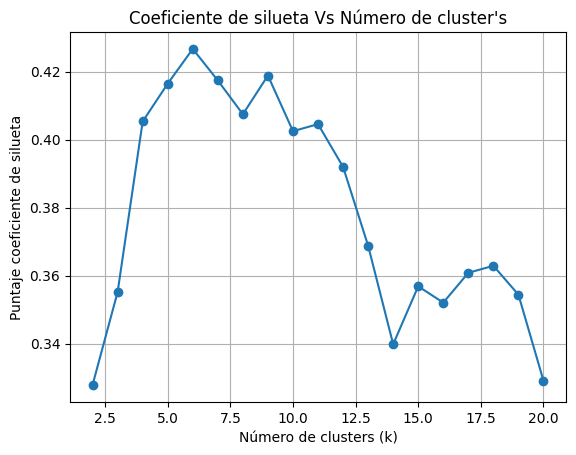

In [7]:
metodo_silueta(n_grupos=20, dataset=dataset_esc, agrupamiento='kmeans')

## 6. Analizando el método elbow y el método de siluetas, se elige un *k=6*

In [8]:
#Se agrupan los datos en seies cluster's
km_6 = KMeans(
    n_clusters=6,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=0
)

y_km_6 = km_6.fit_predict(X=dataset_esc)

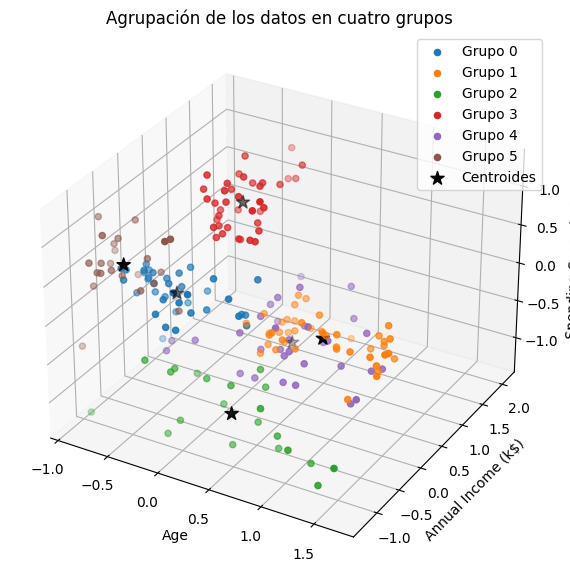

In [9]:
#Graficando los datos en 3D
%matplotlib inline
fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection='3d')

grupo_0 = dataset_esc[y_km_6==0]
grupo_1 = dataset_esc[y_km_6==1]
grupo_2 = dataset_esc[y_km_6==2]
grupo_3 = dataset_esc[y_km_6==3]
grupo_4 = dataset_esc[y_km_6==4]
grupo_5 = dataset_esc[y_km_6==5]

ax.scatter3D(xs=grupo_0['Age'], ys=grupo_0['Annual Income (k$)'], zs=grupo_0['Spending Score (1-100)'], label='Grupo 0')
ax.scatter3D(xs=grupo_1['Age'], ys=grupo_1['Annual Income (k$)'], zs=grupo_1['Spending Score (1-100)'], label='Grupo 1')
ax.scatter3D(xs=grupo_2['Age'], ys=grupo_2['Annual Income (k$)'], zs=grupo_2['Spending Score (1-100)'], label='Grupo 2')
ax.scatter3D(xs=grupo_3['Age'], ys=grupo_3['Annual Income (k$)'], zs=grupo_3['Spending Score (1-100)'], label='Grupo 3')
ax.scatter3D(xs=grupo_4['Age'], ys=grupo_4['Annual Income (k$)'], zs=grupo_4['Spending Score (1-100)'], label='Grupo 4')
ax.scatter3D(xs=grupo_5['Age'], ys=grupo_5['Annual Income (k$)'], zs=grupo_5['Spending Score (1-100)'], label='Grupo 5')
ax.scatter3D(xs=km_6.cluster_centers_[:,0], ys=km_6.cluster_centers_[:,1], zs=km_6.cluster_centers_[:,2], marker='*', s=100, color='black', label='Centroides')
ax.set_xlabel('Age')
ax.set_ylabel('Annual Income (k$)')
ax.set_zlabel('Spending Score (1-100)')
ax.set_title('Agrupación de los datos en cuatro grupos')
ax.legend()
plt.show()

## 7. Aplicando PCA para reducir el número de variables

#### 7.1 Aplicando PCA a todos los componentes para verificar que tan bien captura la varianza de los datos

Suma acumulada de la varianza explicada (%): 
[ 42.71618592  78.39878627 100.        ]


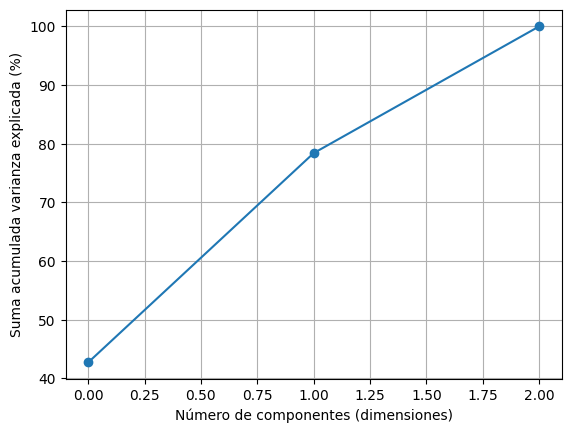

In [10]:
pca_componentes_optimos(dataset=dataset_esc)

#### 7.6 Eligiendo PCA con 2 componentes

In [11]:
pca_2 = PCA(n_components=2) 
columnas = ['PCA {}'.format(i) for i in range(2)]
dataset_pca_2 = pd.DataFrame(pca_2.fit_transform(dataset_esc), columns=columnas)
dataset_pca_2

,PCA 0,PCA 1
0,-0.418516,-1.281003
1,-1.094771,-1.335877
2,0.203167,-1.203770
3,-0.953720,-1.297542
4,-0.009149,-1.196066
...,...,...
195,-0.776065,1.572269
196,0.479299,1.835672
197,-0.807425,1.735398
198,0.167041,2.116100


#### 7.7 El método elbow con dos componentes

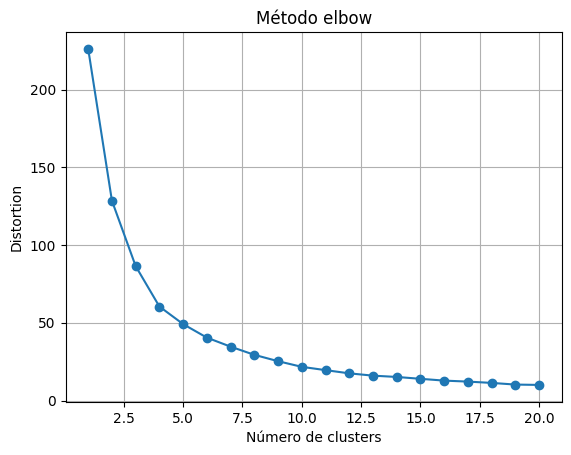

In [12]:
metodo_elbow_kmeans(n_grupos=20, dataset=dataset_pca_2)

#### 7.8 El método de siluetas con dos componentes

Puntaje máximo: 0.4237
Número de cluster: 4


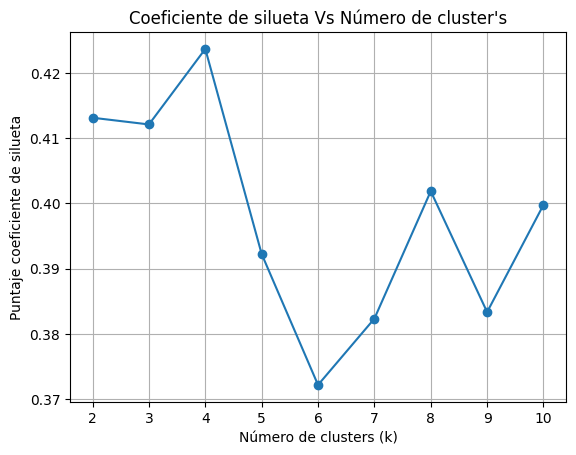

In [13]:
metodo_silueta(n_grupos=10, dataset=dataset_pca_2)

Mediante el análisis del método elbow y el método de siluetas, se elige un *k=4*

#### 7.9 Eligiendo *k=4* para realizar el agrupamiento

In [14]:
#Se agrupan los datos en tres grupos
km_4 = KMeans(
    n_clusters=4,
    init='k-means++',
    n_init=10,
    max_iter=300,
    random_state=0
)

y_km_4 = km_4.fit_predict(X=dataset_pca_2)

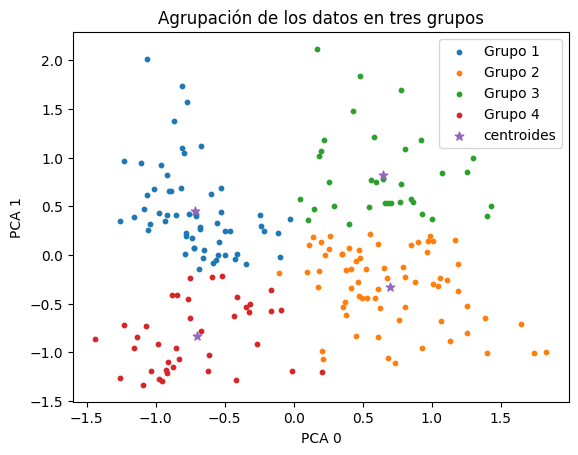

In [15]:
#Graficando los datos en 2D
grupo_0 = dataset_pca_2[y_km_4==0]
grupo_1 = dataset_pca_2[y_km_4==1]
grupo_2 = dataset_pca_2[y_km_4==2]
grupo_3 = dataset_pca_2[y_km_4==3]

plt.scatter(x=grupo_0['PCA 0'], y=grupo_0['PCA 1'], label='Grupo 1', s=10)
plt.scatter(x=grupo_1['PCA 0'], y=grupo_1['PCA 1'], label='Grupo 2', s=10)
plt.scatter(x=grupo_2['PCA 0'], y=grupo_2['PCA 1'], label='Grupo 3', s=10)
plt.scatter(x=grupo_3['PCA 0'], y=grupo_3['PCA 1'], label='Grupo 4', s=10)
plt.scatter(x=km_4.cluster_centers_[:,0], y=km_4.cluster_centers_[:,1], s=40, marker='*', label='centroides')
plt.title('Agrupación de los datos en tres grupos')
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
plt.legend()
plt.show()

## 8. Se crea el dataset final, con los datos agrupados.

Se selecciona los grupos creados con el modelo de kmeans con *k=4*, con la reducción del número de componentes a 2.

In [16]:
dataset_final = dataset.copy(deep=True)
dataset_final['grupos'] = y_km_4
dataset_final

,Age,Annual Income (k$),Spending Score (1-100),grupos
0,19,15,39,3
1,21,15,81,3
2,20,16,6,3
3,23,16,77,3
4,31,17,40,3
...,...,...,...,...
195,35,120,79,0
196,45,126,28,2
197,32,126,74,0
198,32,137,18,2
